In [6]:
import sys
import os

os.chdir("./recsys2019")

In [7]:
import pandas as pd
import data
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = data.train_df('full')

/home/giovanni/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
df = df.head(1000000)
df

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
5,00RL8Z82B2Z1,aff3928535f48,1541037532,6,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
6,00RL8Z82B2Z1,aff3928535f48,1541037532,7,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
7,00RL8Z82B2Z1,aff3928535f48,1541037532,8,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
8,00RL8Z82B2Z1,aff3928535f48,1541037542,9,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
9,00RL8Z82B2Z1,aff3928535f48,1541037542,10,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


# Retrieve session_ids with a single clickout, with interaction item image before clickout 

In [76]:
def filter_more_exactly_one_clickout(x):
    y = x[x['action_type'] == 'clickout item']
    if len(y) == 1:
        return x
    else:
        return pd.DataFrame()

In [77]:
session_with_ckout = df.groupby(['session_id'], as_index=False).apply(filter_more_exactly_one_clickout).reset_index()
session_with_ckout = session_with_ckout.drop(['level_0', 'level_1'], axis=1)
session_with_ckout

,action_type,city,current_filters,device,impressions,platform,prices,reference,session_id,step,timestamp,user_id
0,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,1.0,1.541500e+09,M2E4246PL9XQ
1,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,2.0,1.541500e+09,M2E4246PL9XQ
2,clickout item,"Lengenwang, Germany",NaN,desktop,118737|1305086|4621782|1397441|53118|766713|92...,DE,79|241|96|51|68|99|86|69|71|79|91|67|70|56|82|...,109489,0002ccee5a980,3.0,1.541500e+09,M2E4246PL9XQ
3,clickout item,"Osaka, Japan",NaN,mobile,473691|4493756|103557|2088146|10045128|5788644...,JP,97|101|78|75|99|60|120|78|188|136|97|89|109|99...,473691,0005f5625af6a,1.0,1.541201e+09,71BX0OB63E8B
4,search for destination,"Myrtle Beach, USA",NaN,desktop,NaN,US,NaN,"Myrtle Beach, USA",0008f9d105bbf,1.0,1.541369e+09,0J9R30BACDXZ
5,clickout item,"Myrtle Beach, USA",NaN,desktop,8594588|77720|891699|9903484|10130396|3147142|...,US,789|602|489|54|351|385|83|325|175|84|264|176|8...,1427147,0008f9d105bbf,2.0,1.541369e+09,0J9R30BACDXZ
6,search for item,"Myrtle Beach, USA",NaN,desktop,NaN,US,NaN,64338,0008f9d105bbf,3.0,1.541369e+09,0J9R30BACDXZ
7,clickout item,"Tepoztlán, Mexico",NaN,mobile,3189176|1796797|8005802|2733644|4000306|319682...,MX,150|144|159|77|35|153|69|94|50|109|45|31|87|13...,3247012,0009c673f33c7,1.0,1.541156e+09,YIHTTZVV3O74
8,clickout item,"Gatlinburg, USA",NaN,tablet,7986362|3842300|6855066|6808026|75023|72943|41...,US,105|94|122|307|155|90|135|59|51|131|69|141|113...,6855066,000d3192b88d7,1.0,1.541188e+09,XWFXQ1P7MV69
9,interaction item image,"Gatlinburg, USA",NaN,tablet,NaN,US,NaN,6855066,000d3192b88d7,2.0,1.541188e+09,XWFXQ1P7MV69


In [78]:
just_clk = session_with_ckout[session_with_ckout['action_type'] == 'clickout item']
just_clk

,action_type,city,current_filters,device,impressions,platform,prices,reference,session_id,step,timestamp,user_id
2,clickout item,"Lengenwang, Germany",NaN,desktop,118737|1305086|4621782|1397441|53118|766713|92...,DE,79|241|96|51|68|99|86|69|71|79|91|67|70|56|82|...,109489,0002ccee5a980,3.0,1.541500e+09,M2E4246PL9XQ
3,clickout item,"Osaka, Japan",NaN,mobile,473691|4493756|103557|2088146|10045128|5788644...,JP,97|101|78|75|99|60|120|78|188|136|97|89|109|99...,473691,0005f5625af6a,1.0,1.541201e+09,71BX0OB63E8B
5,clickout item,"Myrtle Beach, USA",NaN,desktop,8594588|77720|891699|9903484|10130396|3147142|...,US,789|602|489|54|351|385|83|325|175|84|264|176|8...,1427147,0008f9d105bbf,2.0,1.541369e+09,0J9R30BACDXZ
7,clickout item,"Tepoztlán, Mexico",NaN,mobile,3189176|1796797|8005802|2733644|4000306|319682...,MX,150|144|159|77|35|153|69|94|50|109|45|31|87|13...,3247012,0009c673f33c7,1.0,1.541156e+09,YIHTTZVV3O74
8,clickout item,"Gatlinburg, USA",NaN,tablet,7986362|3842300|6855066|6808026|75023|72943|41...,US,105|94|122|307|155|90|135|59|51|131|69|141|113...,6855066,000d3192b88d7,1.0,1.541188e+09,XWFXQ1P7MV69
11,clickout item,"Mandelieu-la-Napoule, France",NaN,mobile,894435|48689|100103|116174|224911|2253462|4121...,FR,59|166|45|71|81|40|55|115|55|50|70|50|75|45|14...,894435,000ece658ce0f,1.0,1.541405e+09,5NZNISQDEFDA
13,clickout item,"Udaipur, India",NaN,mobile,2665122|1035566|5738418|10457806|4521358|50694...,IN,55|89|74|90|193|112|1175|164|85|87|95|162|56|2...,2665122,000ef61e73aef,2.0,1.541328e+09,4KV65WB39MAU
14,clickout item,"Roccaraso, Italy",NaN,mobile,1930929|2064274|2277756|2353628|6640710|119736...,IT,100|91|138|100|120|90|125|110|90|140|100|154|1...,2064274,00102e38356c9,1.0,1.541413e+09,W0Z98I673GFQ
25,clickout item,"Iquique, Chile",NaN,mobile,7305970|2250328|4514518|2250230|5904378|277209...,AR,38|55|219|80|140|149|44|92|65|75|140|124|39|47...,2288848,00116d12c0ada,11.0,1.541082e+09,4J2QQC7B0XAP
28,clickout item,"Liverpool, United Kingdom",NaN,mobile,6469126|4528380|2530750|2707162|7126736|152875...,UK,175|175|84|101|121|103|152|108|81|91|149|95|13...,7126736,001194d0b4d55,3.0,1.541277e+09,86WD3V92E1QW


In [79]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [80]:
def existsIndex(df, idx):
    try:
        df.loc[idx]
        return True
    except KeyError:
        return False

In [81]:
session_id_last_ref_int_item_image = []
for idx, row in just_clk.iterrows():
    sess = row['session_id']
    i = 1
    while True:
        if not existsIndex(df, idx - i):
            break
        prev_row = session_with_ckout.loc[idx - i]
        if prev_row['session_id'] != sess:
            break
        if RepresentsInt(prev_row['reference']) and prev_row['action_type'] == 'interaction item image':
            if i == 1:
                session_id_last_ref_int_item_image.append(sess)
                break
            else:
                break
        else:
            i += 1


In [84]:
len(session_id_last_ref_int_item_image)

6847

# Now lets study those

In [85]:
studied_df = session_with_ckout[session_with_ckout['session_id'].isin(session_id_last_ref_int_item_image)]

In [86]:
studied_df

,action_type,city,current_filters,device,impressions,platform,prices,reference,session_id,step,timestamp,user_id
0,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,1.0,1.541500e+09,M2E4246PL9XQ
1,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,2.0,1.541500e+09,M2E4246PL9XQ
2,clickout item,"Lengenwang, Germany",NaN,desktop,118737|1305086|4621782|1397441|53118|766713|92...,DE,79|241|96|51|68|99|86|69|71|79|91|67|70|56|82|...,109489,0002ccee5a980,3.0,1.541500e+09,M2E4246PL9XQ
15,search for destination,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,"Iquique, Chile",00116d12c0ada,1.0,1.541082e+09,4J2QQC7B0XAP
16,interaction item info,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,2.0,1.541082e+09,4J2QQC7B0XAP
17,interaction item image,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,3.0,1.541082e+09,4J2QQC7B0XAP
18,interaction item image,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,4.0,1.541082e+09,4J2QQC7B0XAP
19,interaction item image,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,5.0,1.541082e+09,4J2QQC7B0XAP
20,interaction item image,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,6.0,1.541082e+09,4J2QQC7B0XAP
21,interaction item image,"Iquique, Chile",NaN,mobile,NaN,AR,NaN,493156,00116d12c0ada,7.0,1.541082e+09,4J2QQC7B0XAP


### First, identify the ones that have last reference equal to the clickout and the ones that do not

In [87]:
session_id_last_ref_int_item_image_eq_clickout = []
for idx, row in studied_df[studied_df['action_type'] == 'clickout item'].iterrows():
    if existsIndex(studied_df, idx-1):
        prev_row = studied_df.loc[idx-1]
        if prev_row['session_id'] == row['session_id'] and prev_row['reference'] == row['reference']:
            session_id_last_ref_int_item_image_eq_clickout.append(prev_row['session_id'])
session_id_last_ref_int_item_image_diff_clickout = list(set(session_id_last_ref_int_item_image) - set(session_id_last_ref_int_item_image_eq_clickout))

In [88]:
len(session_id_last_ref_int_item_image_eq_clickout)

5182

In [89]:
len(session_id_last_ref_int_item_image_diff_clickout)

1665

In [106]:
len(session_id_last_ref_int_item_image_diff_clickout)/len(session_id_last_ref_int_item_image_eq_clickout)

0.32130451563103046

In [90]:
studied_df_eq = studied_df[studied_df['session_id'].isin(session_id_last_ref_int_item_image_eq_clickout)]
studied_df_diff = studied_df[studied_df['session_id'].isin(session_id_last_ref_int_item_image_diff_clickout)]

### Idea: time diff among the interaction item image and clickout should be a discriminant among the 2 categories

In [91]:
temporal_diff_eq = []
for idx, row in studied_df_eq[studied_df_eq['action_type'] == 'clickout item'].iterrows():
    if existsIndex(studied_df, idx-1):
        prev_row = studied_df.loc[idx-1]
        temporal_diff_eq.append(int(row['timestamp']) - int(prev_row['timestamp']))
temporal_diff_eq = np.array(temporal_diff_eq)

In [92]:
temporal_diff_diff = []
for idx, row in studied_df_diff[studied_df_diff['action_type'] == 'clickout item'].iterrows():
    if existsIndex(studied_df, idx-1):
        prev_row = studied_df.loc[idx-1]
        temporal_diff_diff.append(int(row['timestamp']) - int(prev_row['timestamp']))
temporal_diff_diff = np.array(temporal_diff_diff)

In [93]:
temporal_diff_diff = temporal_diff_diff[temporal_diff_diff > 0]

In [94]:
temporal_diff_eq = temporal_diff_eq[temporal_diff_eq > 0]

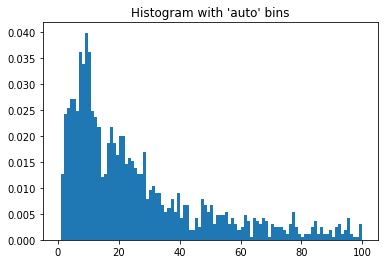

In [95]:
plt.hist(temporal_diff_diff, bins=100, range=(0,100), weights = np.ones(len(temporal_diff_diff))/len(temporal_diff_diff))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

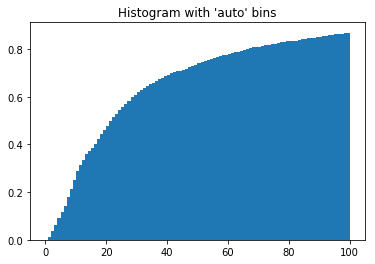

In [126]:
plt.hist(temporal_diff_diff, cumulative=True, bins=100, range=(0,100), weights = np.ones(len(temporal_diff_diff))/len(temporal_diff_diff))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

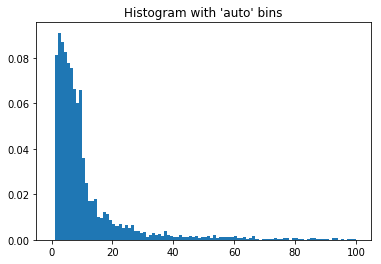

In [96]:
plt.hist(temporal_diff_eq, bins=100, range=(0,100), weights = np.ones(len(temporal_diff_eq))/len(temporal_diff_eq))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

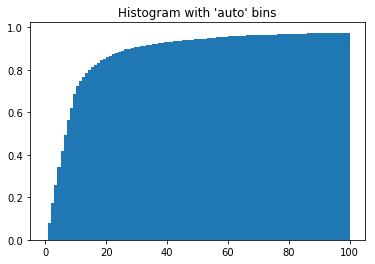

In [127]:
plt.hist(temporal_diff_eq, bins=100, cumulative=True, range=(0,100), weights = np.ones(len(temporal_diff_eq))/len(temporal_diff_eq))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

# So we keep just the sessions with interaction item-image right before the clickout and with last reference that is close in time wrt the clickout

In [128]:
session_id_last_ref_int_item_image_small_time_elapse_from_clk = []
session_id_last_ref_int_item_image_large_time_elapse_from_clk = []
for idx, row in studied_df[studied_df['action_type'] == 'clickout item'].iterrows():
    if existsIndex(studied_df, idx-1):
        prev_row = studied_df.loc[idx-1]
        if prev_row['session_id'] == row['session_id'] and (int(row['timestamp']) - int(prev_row['timestamp']) > 15):
            session_id_last_ref_int_item_image_large_time_elapse_from_clk.append(prev_row['session_id'])
session_id_last_ref_int_item_image_small_time_elapse_from_clk = list(set(session_id_last_ref_int_item_image) - set(session_id_last_ref_int_item_image_large_time_elapse_from_clk))

In [129]:
len(session_id_last_ref_int_item_image_small_time_elapse_from_clk)

4905

In [130]:
len(session_id_last_ref_int_item_image_large_time_elapse_from_clk)

1942

In [131]:
studied_df_small_time_elapse = studied_df[studied_df['session_id'].isin(session_id_last_ref_int_item_image_small_time_elapse_from_clk)]
studied_df_large_time_elapse = studied_df[studied_df['session_id'].isin(session_id_last_ref_int_item_image_large_time_elapse_from_clk)]

In [132]:
studied_df_small_time_elapse

,action_type,city,current_filters,device,impressions,platform,prices,reference,session_id,step,timestamp,user_id
0,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,1.0,1.541500e+09,M2E4246PL9XQ
1,interaction item image,"Lengenwang, Germany",NaN,desktop,NaN,DE,NaN,109489,0002ccee5a980,2.0,1.541500e+09,M2E4246PL9XQ
2,clickout item,"Lengenwang, Germany",NaN,desktop,118737|1305086|4621782|1397441|53118|766713|92...,DE,79|241|96|51|68|99|86|69|71|79|91|67|70|56|82|...,109489,0002ccee5a980,3.0,1.541500e+09,M2E4246PL9XQ
26,interaction item image,"Liverpool, United Kingdom",NaN,mobile,NaN,UK,NaN,7126736,001194d0b4d55,1.0,1.541277e+09,86WD3V92E1QW
27,interaction item image,"Liverpool, United Kingdom",NaN,mobile,NaN,UK,NaN,7126736,001194d0b4d55,2.0,1.541277e+09,86WD3V92E1QW
28,clickout item,"Liverpool, United Kingdom",NaN,mobile,6469126|4528380|2530750|2707162|7126736|152875...,UK,175|175|84|101|121|103|152|108|81|91|149|95|13...,7126736,001194d0b4d55,3.0,1.541277e+09,86WD3V92E1QW
30,search for destination,"Mar del Plata, Argentina",NaN,mobile,NaN,AR,NaN,"Mar del Plata, Argentina",0012e067b9cfc,1.0,1.541124e+09,UXP7SZNBA7IY
31,interaction item info,"Mar del Plata, Argentina",NaN,mobile,NaN,AR,NaN,1087944,0012e067b9cfc,2.0,1.541124e+09,UXP7SZNBA7IY
32,interaction item image,"Mar del Plata, Argentina",NaN,mobile,NaN,AR,NaN,1087944,0012e067b9cfc,3.0,1.541124e+09,UXP7SZNBA7IY
33,interaction item image,"Mar del Plata, Argentina",NaN,mobile,NaN,AR,NaN,1087944,0012e067b9cfc,4.0,1.541124e+09,UXP7SZNBA7IY


In [133]:
session_id_last_ref_int_item_image_small_time_elapse_eq_clickout = []
for idx, row in studied_df_small_time_elapse[studied_df_small_time_elapse['action_type'] == 'clickout item'].iterrows():
    if existsIndex(studied_df_small_time_elapse, idx-1):
        prev_row = studied_df_small_time_elapse.loc[idx-1]
        if prev_row['session_id'] == row['session_id'] and prev_row['reference'] == row['reference']:
            session_id_last_ref_int_item_image_small_time_elapse_eq_clickout.append(prev_row['session_id'])
session_id_last_ref_int_item_image_large_time_elapse_eq_clickout = list(set(session_id_last_ref_int_item_image_small_time_elapse_from_clk) - set(session_id_last_ref_int_item_image_small_time_elapse_eq_clickout))

In [134]:
len(session_id_last_ref_int_item_image_small_time_elapse_eq_clickout)

4259

In [135]:
len(session_id_last_ref_int_item_image_large_time_elapse_eq_clickout)

646

In [136]:
len(session_id_last_ref_int_item_image_large_time_elapse_eq_clickout)/len(session_id_last_ref_int_item_image_small_time_elapse_eq_clickout)

0.1516787978398685